In [2]:
!pip install uproot awkward 
from uproot_io import Events, View
import numpy as np
import matplotlib.pyplot as plt
import features as f

cheated_0 = Events('CheatedRecoFile_0.root')

  Using cached uproot-5.5.1-py3-none-any.whl.metadata (33 kB)
  Using cached awkward-2.7.2-py3-none-any.whl.metadata (7.0 kB)
  Using cached cramjam-2.9.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.9 kB)
  Using cached awkward_cpp-43-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
Using cached uproot-5.5.1-py3-none-any.whl (362 kB)
Using cached awkward-2.7.2-py3-none-any.whl (865 kB)
Using cached awkward_cpp-43-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (637 kB)
Using cached cramjam-2.9.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.4 MB)


In [3]:
def slice_on_event_number(events):
    identifiers = events.event_number
    data = np.arange(0, len(events.event_number))
    slices = []
    start_idx = 0  # Starting index for the current slice

    for i in range(1, len(identifiers)):
        # If the identifier changes, slice the data
        if identifiers[i] != identifiers[i - 1]:
            slices.append(data[start_idx:i])
            start_idx = i  # Update start index for the next slice

    # Add the last slice
    slices.append(data[start_idx:])

    return slices

sliced_idx_0 = slice_on_event_number(cheated_0)
#print(sliced_idx_0[4999])

[261765 261766 261767 261768 261769 261770 261771 261772 261773 261774
 261775 261776 261777 261778 261779 261780 261781 261782 261783 261784
 261785 261786 261787 261788 261789 261790 261791 261792 261793 261794
 261795 261796 261797 261798 261799 261800 261801 261802 261803 261804
 261805 261806 261807 261808 261809 261810 261811 261812 261813 261814
 261815 261816 261817 261818 261819 261820 261821 261822 261823 261824
 261825 261826 261827 261828 261829 261830 261831 261832 261833 261834
 261835 261836 261837 261838 261839 261840 261841 261842 261843 261844
 261845 261846 261847 261848 261849 261850 261851 261852 261853 261854
 261855 261856 261857 261858 261859 261860 261861 261862 261863 261864
 261865 261866 261867 261868 261869 261870 261871 261872 261873 261874
 261875 261876 261877 261878 261879 261880 261881 261882 261883 261884
 261885 261886 261887 261888 261889 261890 261891 261892 261893 261894
 261895 261896 261897 261898 261899 261900 261901 261902 261903 261904
 26190

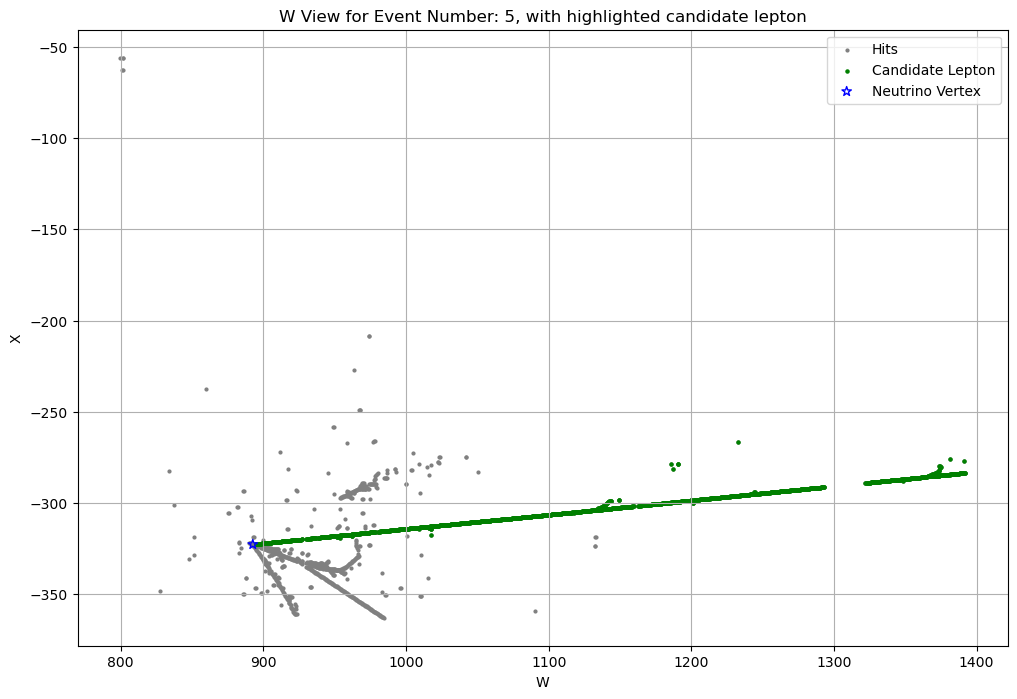

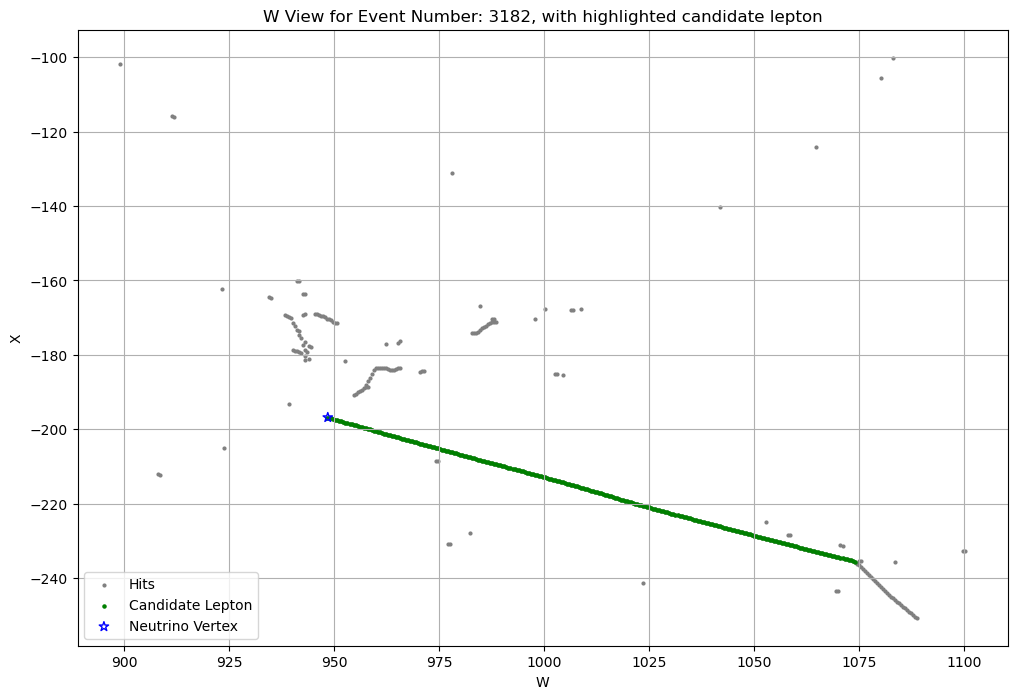

In [11]:
import itertools

def plot_sliced_event(events, event_number):
    event_indices = slice_on_event_number(events)[event_number]

    w_hits_event = []
    x_hits_event = []

    for i in event_indices:
        w_hits_event.append(events.reco_hits_w[i])
        x_hits_event.append(events.reco_hits_x_w[i])

    w_candidate = max(w_hits_event, key=len)
    x_candidate = max(x_hits_event, key=len)

    w_flattened = list(itertools.chain(*w_hits_event))
    x_flattened = list(itertools.chain(*x_hits_event))

    w_vtx = events.neutrino_vtx_w[event_indices[0]]
    x_vtx = events.neutrino_vtx_x[event_indices[0]]
    
    if len(w_hits_event) < 3:
        print(f'Event Number {event_number} has less than 3 hits and may appear insignificant')
    plt.figure(figsize = (12,8))
    plt.scatter(w_flattened, x_flattened, c='grey', s=4, label='Hits')
    plt.scatter(w_candidate, x_candidate, c='g', s=5, label='Candidate Lepton')
    plt.scatter(w_vtx, x_vtx, marker='*', facecolors='none', edgecolors='b', s=50, label='Neutrino Vertex')
    plt.title(f'W View for Event Number: {event_number}, with highlighted candidate lepton')
    plt.ylabel('X')
    plt.xlabel('W')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_sliced_event(cheated_0, 5)
plot_sliced_event(cheated_0, 3182)

In [7]:
#for k in np.arange(10,5000,100):
#    plot_sliced_event(cheated_0, k)

In [12]:
''' Code for identifying candidate lepton in event. '''

def identify_candidate(events):
    identifiers = events.event_number
    data = np.arange(0, len(events.event_number))
    slices = []
    start_idx = 0

    # Split data into slices based on changes in identifiers
    for i in range(1, len(identifiers)):
        if identifiers[i] != identifiers[i - 1]:
            slices.append(data[start_idx:i])
            start_idx = i  # Update start index for the next slice

    slices.append(data[start_idx:])

    results = []

    for event_number, event_indices in enumerate(slices):  # Enumerate slices to get the event number

        w_hits_event = []
        indices = []  # To keep track of the corresponding `i` values
        
        for i in event_indices:
            w_hits_event.append(events.reco_hits_w[i])
            indices.append(i)  # Store the corresponding `i` values
        
        # Find the index of the maximum length in w_hits_event
        max_idx = max(range(len(w_hits_event)), key=lambda idx: len(w_hits_event[idx]))
        
        # Retrieve the corresponding `i` value
        candidate_idx = indices[max_idx]

        results.append((event_number, candidate_idx))
    
    return results

cheated_0_candidates = identify_candidate(cheated_0)
#print(cheated_0_candidates)